In this project, I've utilized the "AmazonProductReviewsData.tsv" dataset obtained through web scraping from Amazon's website. The dataset includes a default classification indicating whether a review is positive or negative.

I've employed the Natural Language Toolkit (NLTK) library's VADER (Valence Aware Dictionary and Sentiment Reasoner) sentiment analysis tool, to compute the sentiment scores for each review. Based on the compound score produced by VADER, I've manually categorized the reviews as either positive or negative.To validate the accuracy of this sentiment analysis, I've compared the results with the default classification provided in the dataset.

In the second part of the project, a Machine Learning approach is used, where after preprocessing the reviews, i will be using the TfidfVectorizer from scikit-learn (sklearn) to convert the collection of text data (contained in the preprocessed_reviews variable) into a TF-IDF (Term Frequency-Inverse Document Frequency) matrix representation. This data along with the encoded default calssification is then given as an input to the RandomForest classifier and the evaluation metrics such as accuracy will be compared with the one obtained through the manual approach.

Importing the necessary Modules and Packages

In [1]:
import os
import numpy as np
import pandas as pd
import nltk
from nltk import corpus, tokenize
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer, porter
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
nltk.download('omw-1.4')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

[nltk_data] Downloading package stopwords to C:\Users\vibhav
[nltk_data]     bhat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\vibhav
[nltk_data]     bhat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\vibhav
[nltk_data]     bhat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\vibhav
[nltk_data]     bhat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\vibhav
[nltk_data]     bhat\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [3]:
df = pd.read_csv("AmazonProductReviewsData.tsv", sep='\t')
df.head()


,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [5]:
df.isnull().sum()

label     0
review    0
dtype: int64

I will be using the polarity_scores method of the SentimentIntensityAnalyzer class to compute the sentiment scores for each review in the DataFrame. The scores include a compound score, positive score, negative score, and neutral score.

In [6]:

df['scores']=df['review'].apply(lambda review : sia.polarity_scores(review) )
df.head(10)

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."
5,pos,an absolute masterpiece: I am quite sure any o...,"{'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'co..."
6,neg,"Buyer beware: This is a self-published book, a...","{'neg': 0.124, 'neu': 0.806, 'pos': 0.069, 'co..."
7,pos,Glorious story: I loved Whisper of the wicked ...,"{'neg': 0.072, 'neu': 0.583, 'pos': 0.346, 'co..."
8,pos,A FIVE STAR BOOK: I just finished reading Whis...,"{'neg': 0.113, 'neu': 0.712, 'pos': 0.174, 'co..."
9,pos,Whispers of the Wicked Saints: This was a easy...,"{'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'com..."


In [7]:
# Extracting the compound score.
df['compound'] = df['scores'].apply(lambda score_dict : score_dict['compound'])
df.head(10)

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781
5,pos,an absolute masterpiece: I am quite sure any o...,"{'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'co...",0.9900
6,neg,"Buyer beware: This is a self-published book, a...","{'neg': 0.124, 'neu': 0.806, 'pos': 0.069, 'co...",-0.8744
7,pos,Glorious story: I loved Whisper of the wicked ...,"{'neg': 0.072, 'neu': 0.583, 'pos': 0.346, 'co...",0.9900
8,pos,A FIVE STAR BOOK: I just finished reading Whis...,"{'neg': 0.113, 'neu': 0.712, 'pos': 0.174, 'co...",0.8353
9,pos,Whispers of the Wicked Saints: This was a easy...,"{'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'com...",0.8196


In [9]:
#manually assigning the reviews into positive or negative categories.
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
df.head(10)

,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos
5,pos,an absolute masterpiece: I am quite sure any o...,"{'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'co...",0.9900,pos
6,neg,"Buyer beware: This is a self-published book, a...","{'neg': 0.124, 'neu': 0.806, 'pos': 0.069, 'co...",-0.8744,neg
7,pos,Glorious story: I loved Whisper of the wicked ...,"{'neg': 0.072, 'neu': 0.583, 'pos': 0.346, 'co...",0.9900,pos
8,pos,A FIVE STAR BOOK: I just finished reading Whis...,"{'neg': 0.113, 'neu': 0.712, 'pos': 0.174, 'co...",0.8353,pos
9,pos,Whispers of the Wicked Saints: This was a easy...,"{'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'com...",0.8196,pos


EVALUATION MATRIX

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [11]:
print(confusion_matrix(df['label'], df['comp_score']))
print("************"*10)
print(classification_report(df['label'], df['comp_score']))
print("************"*10)
print(accuracy_score(df['label'], df['comp_score']))

[[2629 2468]
 [ 435 4468]]
************************************************************************************************************************
              precision    recall  f1-score   support

         neg       0.86      0.52      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000

************************************************************************************************************************
0.7097


BUILDING MACHINE LEARNING APPROACH

In [12]:
df = pd.read_csv("AmazonProductReviewsData.tsv", sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


PREPROCESSING THE REVIEWS

In [13]:
from tqdm import tqdm

preprocessed_reviews = []

for sentence in tqdm(df['review'].values):
    sentence = re.sub('[^a-zA-Z]',' ',sentence)
    sentence = ' '.join(low.lower() for low in sentence.split() if low.lower() not in stopwords.words('english'))
    preprocessed_reviews.append(sentence.strip())

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [02:40<00:00, 62.36it/s]


FEATURE EXTRACTION

TF-IDF : Term Frequency - Inverse Documents Frequency

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(preprocessed_reviews).toarray()
pd.DataFrame(x).shape

(10000, 30543)

In [15]:
df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.codes

In [16]:
df['label'].value_counts()

0    5097
1    4903
Name: label, dtype: int64

In [17]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, df['label'], test_size=0.25, random_state=1)

In [18]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [20]:
print("Training Accuracy :",accuracy_score(y_train, y_pred_train))
print("*************"*10)
print("Test Accuracy :",accuracy_score(y_test, y_pred_test))

Training Accuracy : 1.0
**********************************************************************************************************************************
Test Accuracy : 0.8404


The high performance on training data suggests that the  model has overfit the training data. Therefore i use Cross-Validation to assess the model's performance across multiple validation sets.

In [21]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf, x_train, y_train, cv=5)
training_accuracy.mean()

0.8344000000000001

In [30]:
new_df = df.copy()
file_object = open("Reviews_to_text.txt",mode = "a")
for i in range(0, len(new_df.index)):
    file_object = open("Reviews_to_text.txt",mode = "a")
    file_object.write(new_df.loc[i]["review"])
    file_object.close()
file_object.close()


In [31]:
file_object = open("Reviews_to_text.txt",mode = "r")
Review_Text = file_object.read()
file_object.close()

In [32]:
Review_Text_cleaned = re.sub(r'[^\w\s]','',Review_Text)
Review_Text_cleaned = Review_Text_cleaned.lower()
words = word_tokenize(Review_Text_cleaned)
stop_words = set(stopwords.words('english'))
word_filtered = [word for word in words if word not in stop_words]


In [33]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in word_filtered]


In [34]:
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
average_sentiment

0.024997522620674412

In [35]:
positive_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] >=-0.1 and
                sentiment_scores[i] <= 0.1]

In [36]:
word_freq_postive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)

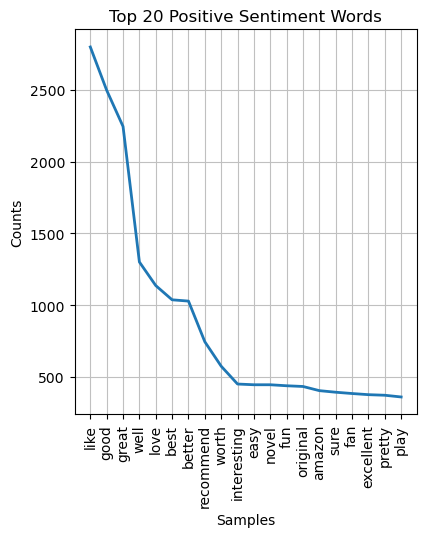

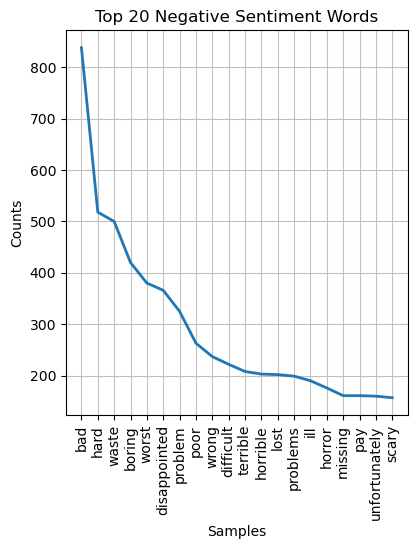

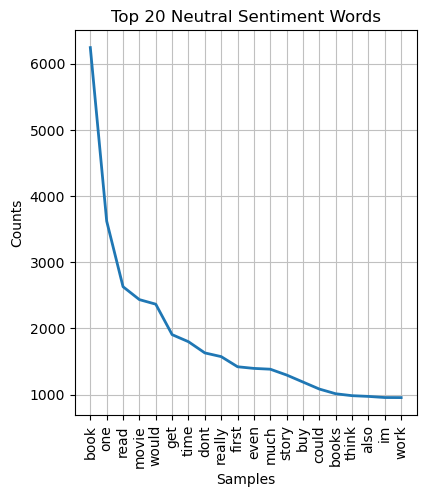

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(131)
word_freq_postive.plot(20, title="Top 20 Positive Sentiment Words")

plt.figure(figsize=(15,5))
plt.subplot(132)
word_freq_negative.plot(20, title="Top 20 Negative Sentiment Words")

plt.figure(figsize=(15,5))
plt.subplot(133)
word_freq_neutral.plot(20, title="Top 20 Neutral Sentiment Words")

plt.tight_layout()
plt.show()

In [38]:
df_positive = pd.DataFrame(word_freq_postive.most_common(20), columns=['Word','Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns=['Word','Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), columns=['Word','Frequency'])

In [39]:
fig_positive = px.bar(df_positive, x ='Word', y='Frequency', title="Top 20 Positive Sentiment Words")
fig_negative = px.bar(df_negative, x ='Word', y='Frequency', title="Top 20 negative Sentiment Words")
fig_neutral = px.bar(df_neutral, x ='Word', y='Frequency', title="Top 20 neutral Sentiment Words")

fig_positive.show()
fig_negative.show()
fig_neutral.show()

In [40]:
wordcloud_postive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_postive)
wordcloud_negative = WordCloud(width=800, height=400, background_color='blue').generate_from_frequencies(word_freq_negative)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_neutral)

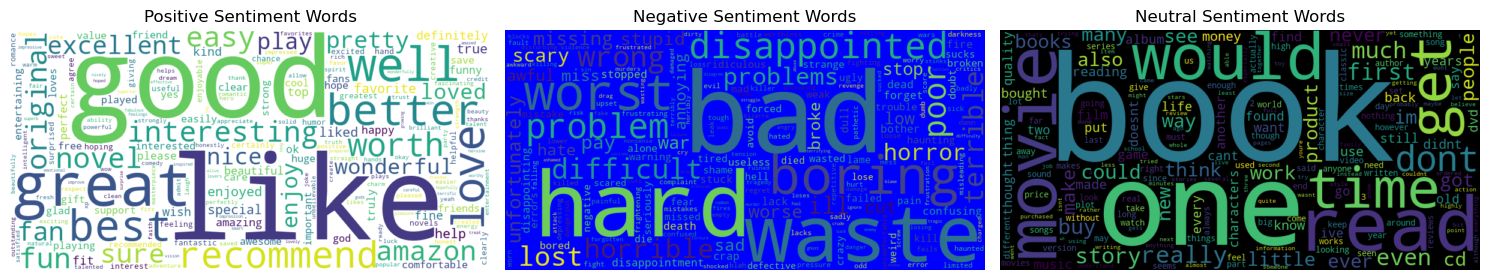

In [41]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(wordcloud_postive, interpolation = 'bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation = 'bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation = 'bilinear')
plt.axis('off')
plt.title("Neutral Sentiment Words")

plt.tight_layout()
plt.show()